In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f=pd.read_csv("clustering_res.csv",encoding='utf-8')
f2=pd.read_csv("allBikes2019.03.28 24h.csv",encoding='utf-8')
times=sorted(set(f2['time']))
f2['time']=f2['time'].apply(lambda x :times.index(x)*24/len(times))#将原始数据的时间戳转换为0-24的float

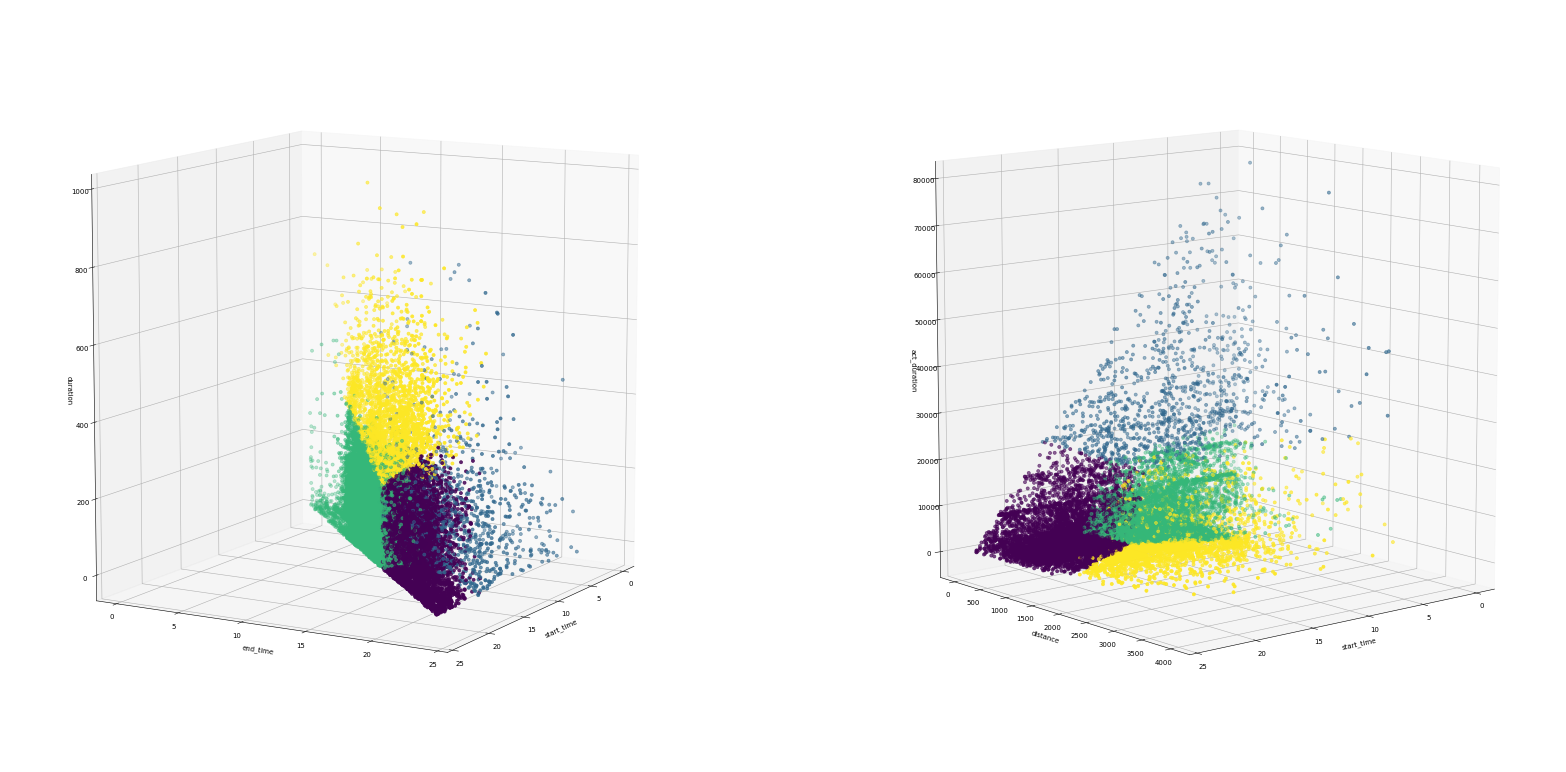

In [42]:
'''
绘制图5、图6
'''
fig = plt.figure(figsize=(40,20),dpi=50)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(f.start_time,f.end_time,f.duration,c=f['labels'],depthshade=True)
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('start_time') 
ax.set_ylabel('end_time')
ax.set_zlabel('duration')
ax.view_init(elev=10,azim=30)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(f.start_time,f.distance,f.act_duration,c=f['labels'],depthshade=True)
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('start_time') 
ax.set_ylabel('distance')
ax.set_zlabel('act_duration')
ax.view_init(elev=10,azim=50)

plt.show()

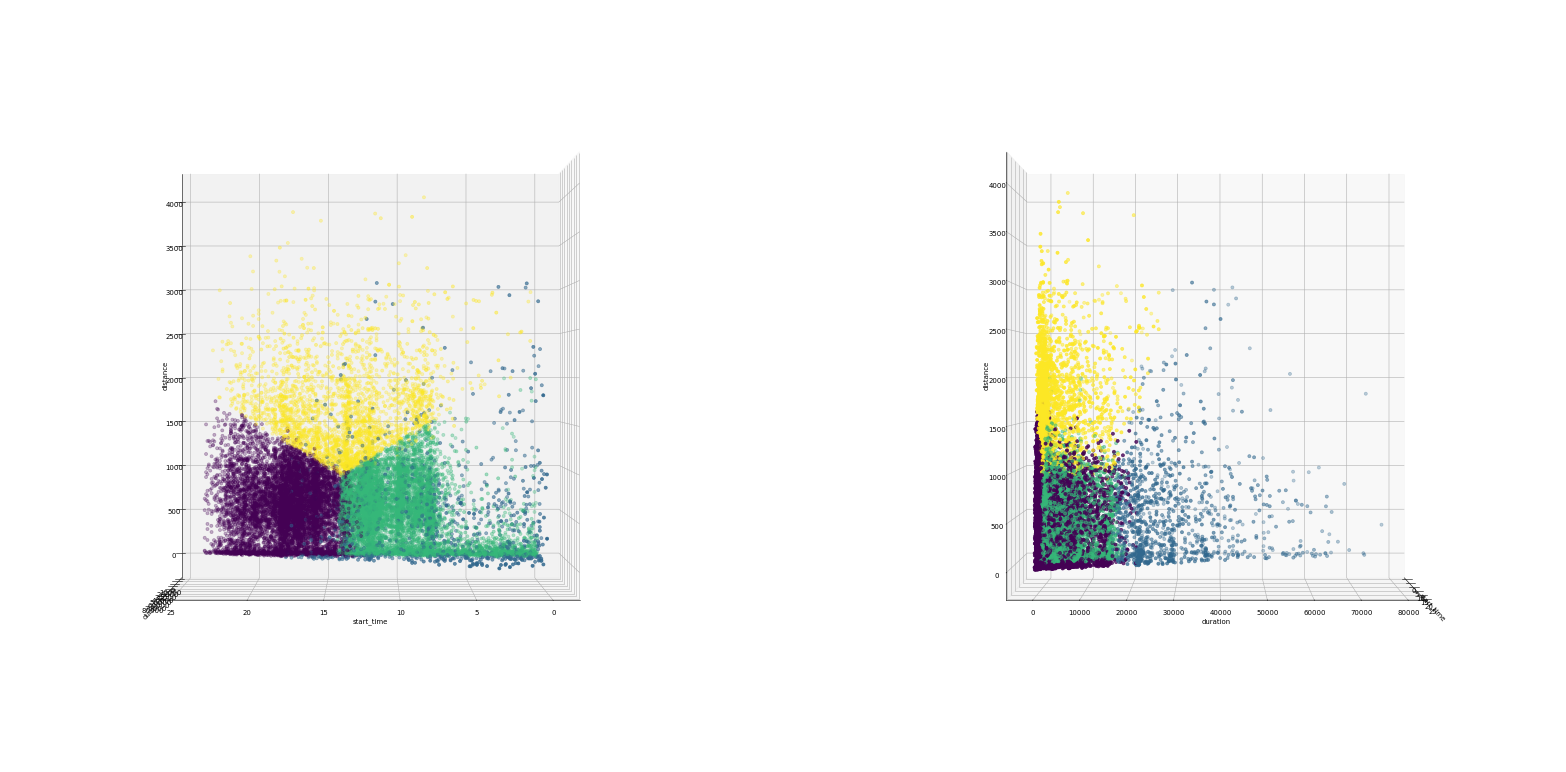

In [43]:
'''
绘制图6、图7
'''
fig = plt.figure(figsize=(40,20),dpi=50)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(f.start_time,f.act_duration,f.distance,c=f['labels'],depthshade=True)
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('start_time') 
ax.set_ylabel('duration')
ax.set_zlabel('distance')
ax.view_init(elev=0,azim=90)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(f.start_time,f.act_duration,f.distance,c=f['labels'],depthshade=True)
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('start_time') 
ax.set_ylabel('duration')
ax.set_zlabel('distance')
ax.view_init(elev=0,azim=0)

plt.show()

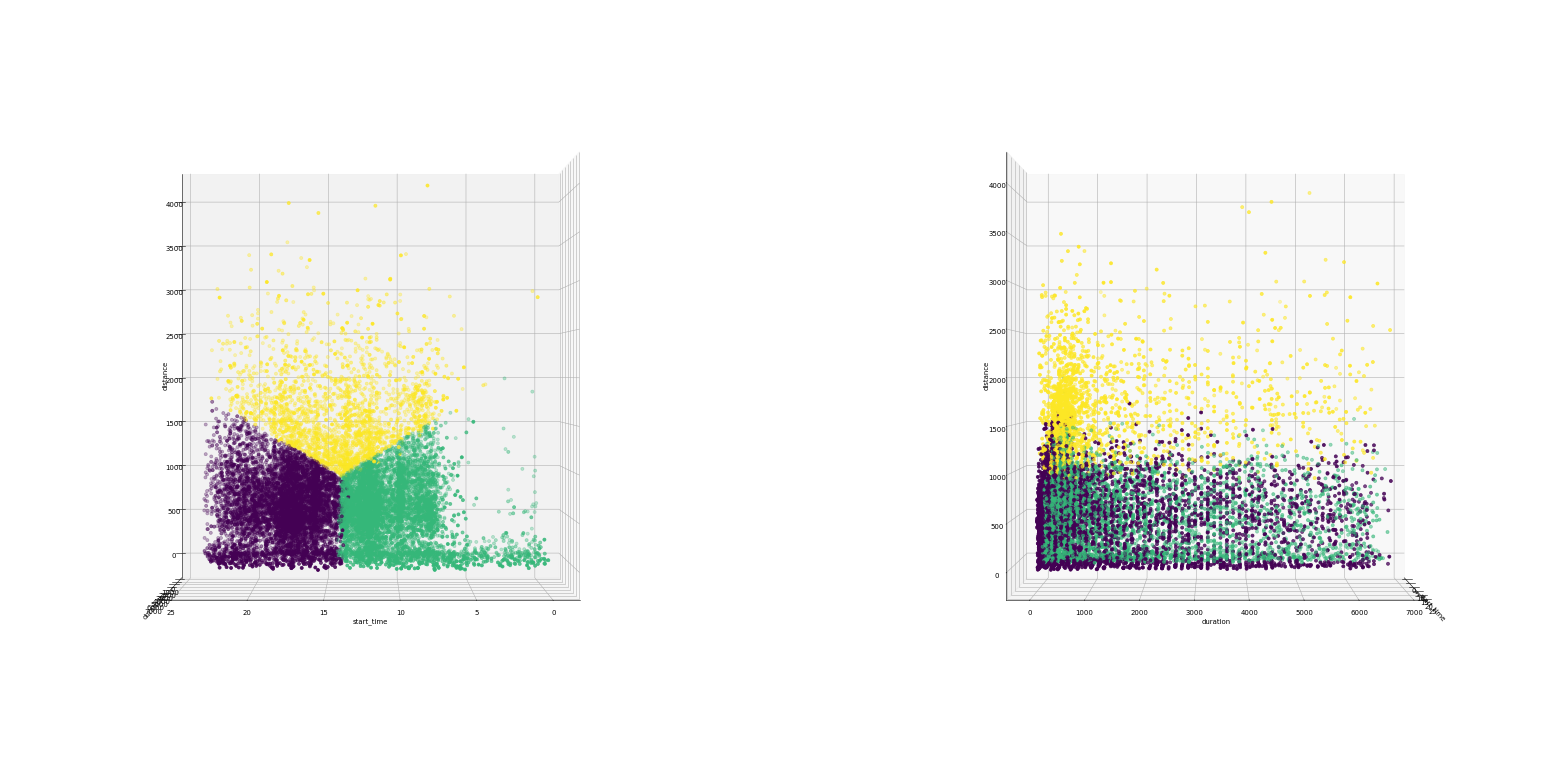

In [47]:
'''
绘制图11、图12
'''
selected_f=f.query('end_time-start_time<1.8')#骑行时间小于1.8小时
fig = plt.figure(figsize=(40,20),dpi=50)

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(selected_f.start_time,selected_f.act_duration,selected_f.distance,c=selected_f['labels'],depthshade=True)
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('start_time') 
ax.set_ylabel('duration')
ax.set_zlabel('distance')
ax.view_init(elev=0,azim=90)

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(selected_f.start_time,selected_f.act_duration,selected_f.distance,c=selected_f['labels'],depthshade=True)
# 设置坐标轴显示以及旋转角度
ax.set_xlabel('start_time') 
ax.set_ylabel('duration')
ax.set_zlabel('distance')
ax.view_init(elev=0,azim=0)

plt.show()

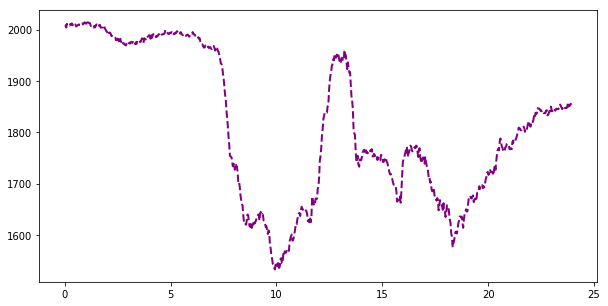

In [54]:
'''
图9  可用单车总数量与时间变化曲线
'''
selected_f2=f2.groupby('time').count()
plt.figure(figsize=(10,5))
# plt.scatter(a.index,a['bikeno'].tolist(),marker='.',linewidths=0.1)
plt.plot(selected_f2.index,selected_f2['bikeno'], color='purple', linewidth=2.0, linestyle='--', label='linear line',)
plt.show()

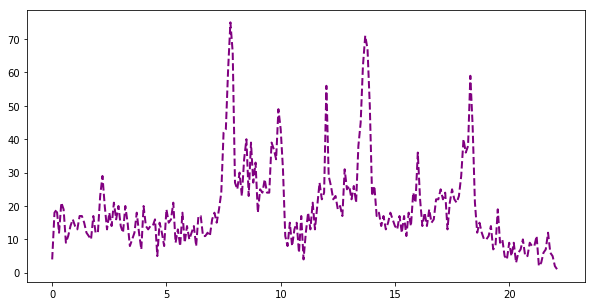

In [55]:
'''
图10 出校骑行数与时间变化曲线 出校骑行：骑行时长>1.8小时
'''
import pandas as pd
import matplotlib.pyplot as plt 


selected_f=f.query('end_time-start_time>1.8').groupby('start_time').count()
plt.figure(figsize=(10,5))
plt.plot(selected_f.index,selected_f['duration'].tolist(), color='purple', linewidth=2.0, linestyle='--', label='linear line',)
plt.show()

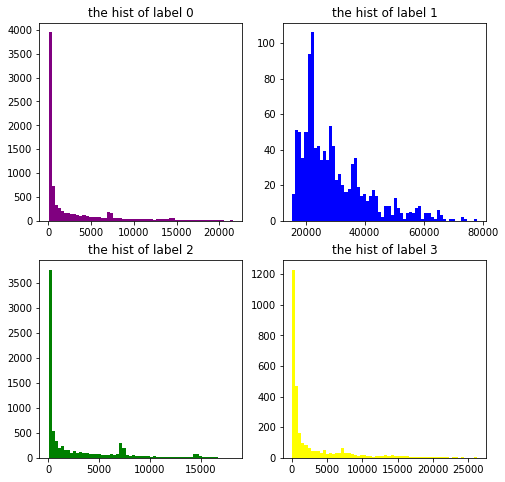

In [56]:
'''
图13 不同类别的骑行时长直方图
'''
fig,ax=plt.subplots(2,2,figsize=(8, 8))
for i in range(4):
    c=['purple','blue','green','yellow']
    ax[int(i/2)][i%2].hist(f[f['labels']==i]['act_duration'],bins=60,color=c[i])
    ax[int(i/2)][i%2].set_title('the hist of label '+str(i))
#     ax[i].xlim((0,20000))
plt.show()

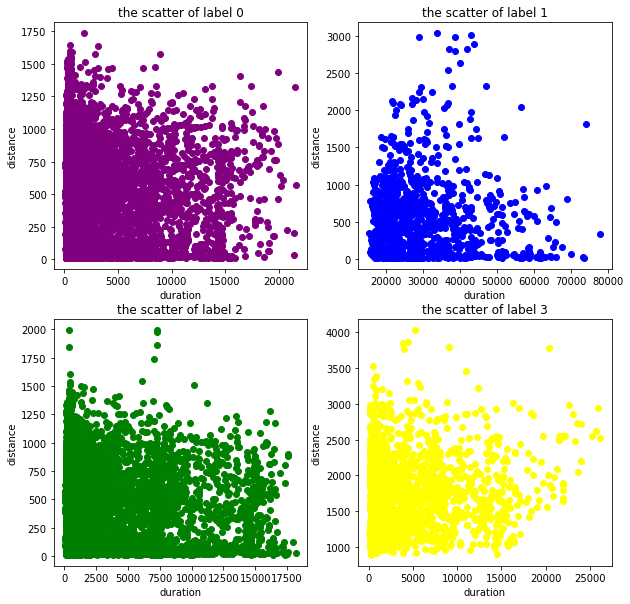

In [57]:
'''
图14 不同类别的骑行距离-骑行时长散点图
'''
fig,ax=plt.subplots(2,2,figsize=(10, 10))
for i in range(4):
    c=['purple','blue','green','yellow']
    ax[int(i/2)][i%2].scatter(f[f['labels']==i]['act_duration'],f[f['labels']==i]['distance'],color=c[i])
    ax[int(i/2)][i%2].set_title('the scatter of label '+str(i))
    ax[int(i/2)][i%2].set_xlabel('duration')
    ax[int(i/2)][i%2].set_ylabel('distance')
#     ax[i].xlim((0,20000))
plt.show()

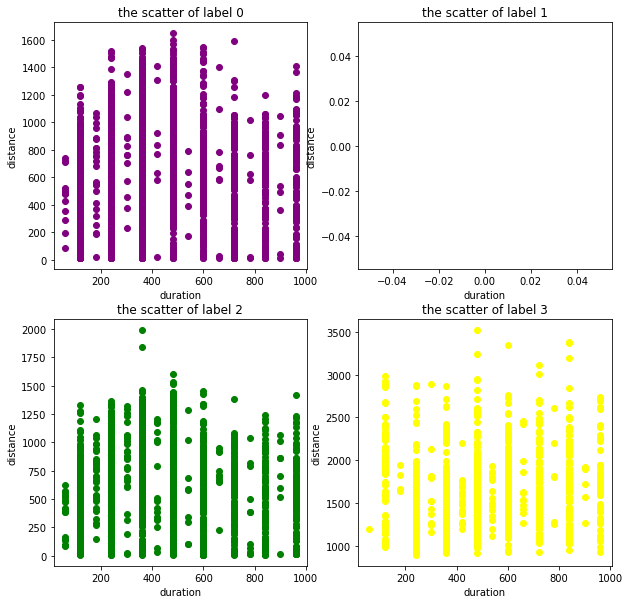

In [59]:
'''
图15 骑行时长1000秒内不同类别的骑行距离-骑行时长散点图
'''
selected_f=f.query('act_duration<1000')
fig,ax=plt.subplots(2,2,figsize=(10, 10))
for i in range(4):
    c=['purple','blue','green','yellow']
    ax[int(i/2)][i%2].scatter(selected_f[selected_f['labels']==i]['act_duration'],selected_f[selected_f['labels']==i]['distance'],color=c[i])
    ax[int(i/2)][i%2].set_title('the scatter of label '+str(i))
    ax[int(i/2)][i%2].set_xlabel('duration')
    ax[int(i/2)][i%2].set_ylabel('distance')
#     ax[i].xlim((0,20000))
plt.show()

In [68]:
'''
图16 时长在1000秒以下的记录中的骑行开始时间、骑行时长、骑行距离相关系数矩阵
'''
selected_f=f.query('act_duration<1000')[['start_time','act_duration','distance']]
selected_f.corr()

,start_time,act_duration,distance
start_time,1.000000,0.009074,0.024147
act_duration,0.009074,1.000000,0.311887
distance,0.024147,0.311887,1.000000


In [73]:
'''
图17 时间在13点-13点30间，时长在1000秒以下的记录中的骑行开始时间、骑行时长、骑行距离相关系数矩阵
'''
selected_f=f.query('act_duration<1000').query('start_time<=13.5').query('start_time>=13')[['start_time','act_duration','distance']]
selected_f.corr()

,start_time,act_duration,distance
start_time,1.000000,0.040119,0.040698
act_duration,0.040119,1.000000,0.425658
distance,0.040698,0.425658,1.000000


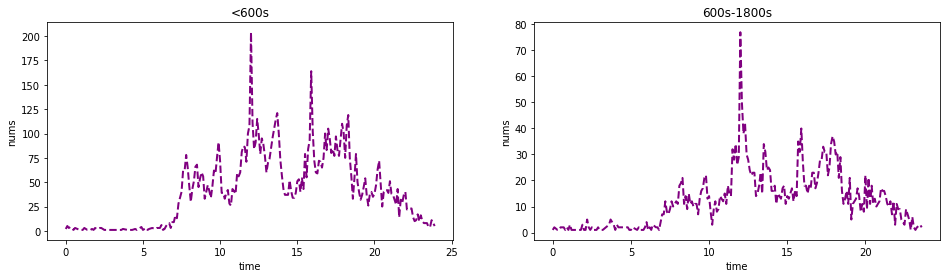

In [132]:
'''
图20 正常骑行数量-时间变化曲线
图21 异常骑行数量-时间变化曲线
'''

temp1=f.query('act_duration<600')
a=temp1.groupby('start_time').count()
temp2=f.query('act_duration>=600').query('act_duration<1800')
b=temp2.groupby('start_time').count()

fig,ax=plt.subplots(1,2,figsize=(16, 4))
ax[0].plot(a.index,a['duration'].tolist(), color='purple', linewidth=2.0, linestyle='--', label='linear line',)
ax[0].set_title('<600s')
ax[0].set_xlabel('time')
ax[0].set_ylabel('nums')
ax[1].plot(b.index,b['duration'].tolist(), color='purple', linewidth=2.0, linestyle='--', label='linear line',)
ax[1].set_title('600s-1800s')
ax[1].set_xlabel('time')
ax[1].set_ylabel('nums')
plt.show()

In [117]:
'''
<600的平均速度
'''
sum(temp1['distance'])/sum(temp1['act_duration'])

2.8142650484246658

In [118]:
'''
600-1800的平均速度
'''
sum(temp2['distance'])/sum(temp2['act_duration'])

0.80207298744294608

In [135]:
'''
查看图21中的流转高峰，是15.9时刻
'''
b.query('end_time>35')

,end_time,start_lat,start_lng,end_lat,end_lng,act_duration,duration,distance,labels
start_time,,,,,,,,,
12.0,77,77,77,77,77,77,77,77,77
12.1,50,50,50,50,50,50,50,50,50
12.2,38,38,38,38,38,38,38,38,38
12.3,42,42,42,42,42,42,42,42,42
15.9,40,40,40,40,40,40,40,40,40
17.9,37,37,37,37,37,37,37,37,37


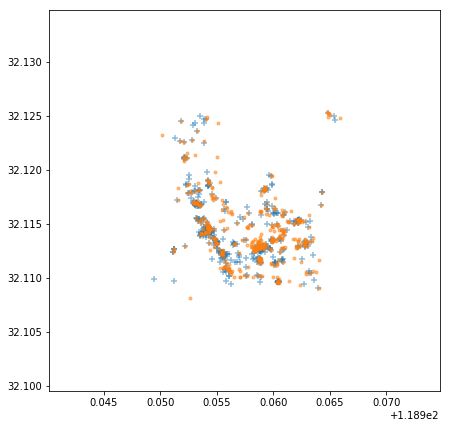

In [136]:
'''
图22 图22 流转热点散点图
'''
select_f1=f.query("end_time>=15.7838867").query("end_time<=15.9505533")
select_f2=f.query("start_time>=15.7838867").query("start_time<=15.9505533")
plt.figure(figsize=(7,7))
plt.scatter(select_f1['end_lat'],select_f1['end_lng'],alpha=0.5,marker='+')
plt.scatter(select_f2['start_lat'],select_f2['start_lng'],alpha=0.5,marker='.')
plt.show()